# Matematický software 

## Cv. 6 - Nelineární rovnice

Prezentace: [POSEL](MS6_soubory/NelinearniRovnice.pdf)

### Cognitive Apprenticeship

V tomto cvičení ...

In [ ]:
!python -m pip install matplotlib

In [ ]:
!python -m pip install numpy

In [ ]:
!python -m pip install scipy

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

#### Funkce

In [ ]:
def f(x):
    return 10 -x**2

a0 = 0
b0 = 4
x = np.linspace(a0, b0, 100)
plt.plot(x, f(x), "r.")
plt.plot(x, [0]*len(x), "b-")
plt.show()

#### CACv.6.1: Bisekce (půlení intervalu)

<img src="MS6_soubory/bisekce.png" alt="Drawing" style="width: 600px;"/>

In [ ]:
a = a0
b = b0
n = 3
xs = np.empty(shape=[n])

for i in range(n):
    x = (a + b)/2
    if f(a)*f(x) < 0:
        b = x
    else:
        a = x
    print(i, x)
    xs[i] = x

print(xs)
x = np.linspace(a0, b0, 100)
plt.plot(x, f(x), "r")
plt.plot(xs, f(xs), "bo")
plt.show()

<img src="MS6_soubory/stopbisekce.png" alt="Drawing" style="width: 400px;"/>

In [ ]:
a = a0
b = b0
eps = 0.001

while b**2 - a**2 > 2*eps:
    x = (a + b)/2
    if f(a)*f(x) < 0:
        b = x
    else:
        a = x
    print(x)

print(x)
plt.plot(x, f(x), "bo")
plt.plot(np.linspace(a0, b0, 100), f(np.linspace(a0, b0, 100)), "r")
plt.show()

In [56]:
from scipy import optimize

x = optimize.bisect(f, a0, b0)
print(x)

3.162277660167092


#### CACv.6.2: Regula falsi (metoda tětiv)

<img src="MS6_soubory/regulafalsi.png" alt="Drawing" style="width: 350px;"/>

In [59]:
a = a0
b = b0
delta = 1E-3

xnew = (a+b)/2
xold = a
while abs(xnew - xold) > delta:
    xold = xnew
    xnew = a - f(a)*(b-a)/(f(b)-f(a))
    if f(a)*f(xnew) < 0:
        b = xnew
    else:
        a = xnew
print(xnew)

3.162261467346213


#### CACv.6.3: Newtonova metoda (metoda tečen)

<img src="MS6_soubory/newton.png" alt="Drawing" style="width: 300px;"/>

In [61]:
#derivace pomoci centralni diference
def df(x, h = 1E-3):
    return (f(x+h)-f(x-h))/(2*h)

a = a0
b = b0
delta = 1E-3

xnew = (a+b)/2
xold = a
while abs(xnew - xold) > delta:
    xold = xnew
    xnew = xold - f(xold)/df(xold)
print(xnew)

3.1622776604441363


In [58]:
from scipy import optimize

x = optimize.newton(f, x0=(a0+b0/2))
print(x)

3.1622776601683795


### Samostatná cvičení

#### SCv.6.1: Nalezněte kořeny funkcí

<img src="MS6_soubory/cviceni_koreny.png" alt="Drawing" style="width: 600px;"/>

In [72]:
def plot_result(f, a0, b0, x):
    print("root: ", x)
    plt.plot(x, f(x), "bo")
    plt.plot(np.linspace(a0, b0, 100), f(np.linspace(a0, b0, 100)), "r")
    plt.show()

In [ ]:
def bisekce(f, a0, b0, eps=1E-3):
    a, b = a0, b0
    while b**2 - a**2 > 2*eps:
        x = (a + b)/2
        if f(a)*f(x) < 0:
            b = x
        else:
            a = x
    return x

In [ ]:
def regula_falsi(f, a0, b0, delta=1E-3):
    a, b = a0, b0
    xnew = (a+b)/2
    xold = a
    while abs(xnew - xold) > delta:
        xold = xnew
        xnew = a - f(a)*(b-a)/(f(b)-f(a))
        if f(a)*f(xnew) < 0:
            b = xnew
        else:
            a = xnew
    return xnew

In [87]:
def newton(f, a0, b0, delta=1E-3):
    a, b = a0, b0
    def df(x, h = 1E-3):
        return (f(x+h)-f(x-h))/(2*h)
    xnew = (a+b)/2
    xold = a
    while abs(xnew - xold) > delta:
        xold = xnew
        xnew = xold - f(xold)/df(xold)
    return xnew

root:  0.5675048828125


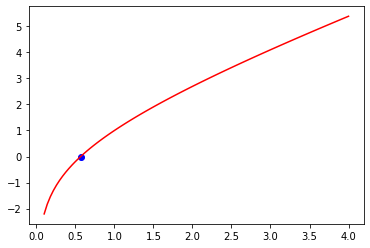

root:  1.8952758789062498


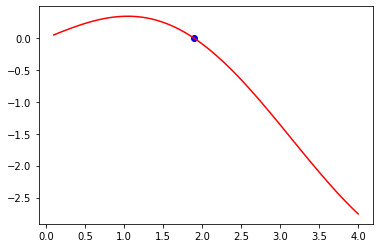

root:  0.8341064453125


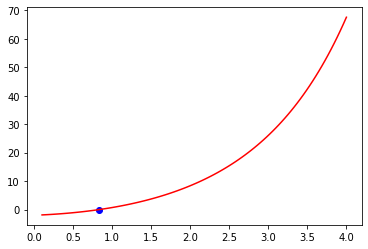

root:  0.5671432903788571


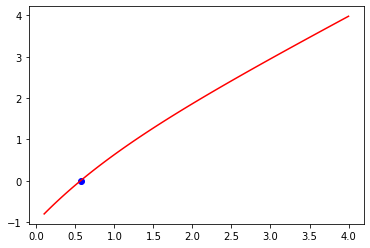

root:  1.1623398350227723


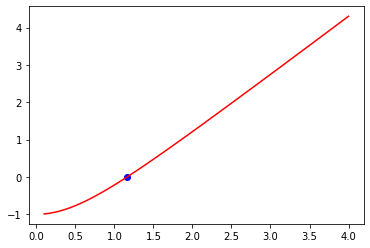

In [89]:
plot_result(
    f=lambda x: x + np.log(x), a0=0.1, b0=4, 
    x=bisekce(f=lambda x: x + np.log(x), a0=0.1, b0=4)
)

plot_result(
    f=lambda x: np.sin(x) - 0.5*x, a0=0.1, b0=4, 
    x=bisekce(f=lambda x: np.sin(x) - 0.5*x, a0=0.1, b0=4)
)

plot_result(
    f=lambda x: np.exp(x) + x**2 - 3, a0=0.1, b0=4, 
    x=bisekce(f=lambda x: np.exp(x) + x**2 - 3, a0=0.1, b0=4)
)

plot_result(
    f=lambda x: x - np.exp(-x), a0=0.1, b0=4, 
    x=newton(f=lambda x: x - np.exp(-x), a0=0.1, b0=4)
)

plot_result(
    f=lambda x: x*np.arctan(x) - 1, a0=0.1, b0=4, 
    x=newton(f=lambda x: x*np.arctan(x) - 1, a0=0.1, b0=4)
)